<a href="https://colab.research.google.com/github/rutujabadadare-ai/House-Price-Prediction-System/blob/main/ML_Project(HousePricePrediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/dataset/train.csv',keep_default_na= False)
df_test=pd.read_csv("/content/drive/MyDrive/dataset/test.csv",keep_default_na= False)

In [ ]:
# Have NA Category
Valid_cat = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
        'BsmtFinType1','BsmtFinType2', 'FireplaceQu', 'GarageType',
        'GarageFinish', 'GarageQual', 'GarageCond',
        'PoolQC', 'Fence', 'MiscFeature']

In [ ]:
dict1 = {}
for i in df_train.columns.drop('SalePrice'):
    if i not in Valid_cat:
        dict1[i] = ['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null']
    else:
        dict1[i] = ['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NULL', 'NaN', 'n/a', 'nan', 'null']

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/dataset/train.csv',
                       keep_default_na= False, na_values= dict1)
df_test = pd.read_csv('/content/drive/MyDrive/dataset/test.csv',
                       keep_default_na= False, na_values= dict1)

In [ ]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NA,Reg,Lvl,AllPub,...,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,142125


In [ ]:
df_train.isna().sum()[df_train.isna().sum()>0]

,0
LotFrontage,259
MasVnrType,8
MasVnrArea,8
Electrical,1
GarageYrBlt,81


In [ ]:
df_test.isna().sum()[df_test.isna().sum()>0]

,0
MSZoning,4
LotFrontage,227
Utilities,2
Exterior1st,1
Exterior2nd,1
MasVnrType,16
MasVnrArea,15
BsmtFinSF1,1
BsmtFinSF2,1
BsmtUnfSF,1


##Outlier Detection

In [ ]:
import matplotlib.pyplot as plt

(array([ 22., 126., 380., 343., 229., 144.,  86.,  49.,  28.,  23.,  12.,
          7.,   3.,   1.,   2.,   1.,   2.,   0.,   0.,   2.]),
 array([ 34900.,  70905., 106910., 142915., 178920., 214925., 250930.,
        286935., 322940., 358945., 394950., 430955., 466960., 502965.,
        538970., 574975., 610980., 646985., 682990., 718995., 755000.]),
 <BarContainer object of 20 artists>)

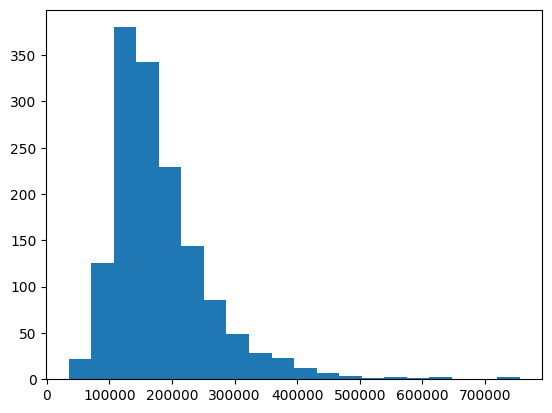

In [ ]:
plt.hist(df_train['SalePrice'], bins = 20)

{'whiskers': [<matplotlib.lines.Line2D at 0x7afcb448ec50>,
 'caps': [<matplotlib.lines.Line2D at 0x7afcb448ffd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7afcb45a8f50>],
 'medians': [<matplotlib.lines.Line2D at 0x7afcb4469510>],
 'fliers': [<matplotlib.lines.Line2D at 0x7afcb4469e90>],
 'means': []}

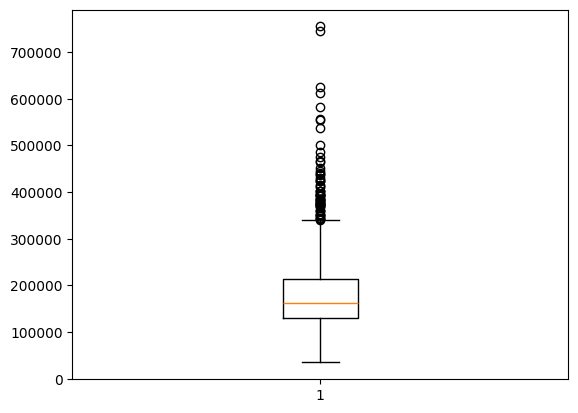

In [ ]:
plt.boxplot(df_train['SalePrice'])

In [ ]:
z_score = (df_train['SalePrice'] - df_train['SalePrice'].mean())/ df_train['SalePrice'].std()
z_score

,SalePrice
0,0.347154
1,0.007286
2,0.535970
3,-0.515105
4,0.869545
...,...
1455,-0.074534
1456,0.366036
1457,1.077242
1458,-0.488356


In [ ]:
df_train = df_train[(z_score >-1 ) & (z_score<=1)]

In [ ]:
columns_cat = list(df_train.select_dtypes(include = 'object').columns)
columns_num = list(df_train.select_dtypes(exclude = 'object').columns)
columns_num.remove('Id')
columns_num.remove('SalePrice')

## Filling Missing Data - Simple Imputer

In [ ]:
from sklearn.impute import SimpleImputer
imputer_cat = SimpleImputer(strategy= 'most_frequent')
imputer_num = SimpleImputer(strategy= 'median')

imputer_cat.fit(df_train[columns_cat])
imputer_num.fit(df_train[columns_num])

df_train[columns_cat] = imputer_cat.transform(df_train[columns_cat])
df_train[columns_num] = imputer_num.transform(df_train[columns_num])

df_test[columns_cat] = imputer_cat.transform(df_test[columns_cat])
df_test[columns_num] = imputer_num.transform(df_test[columns_num])

In [ ]:
df_train.isna().sum()[df_train.isna().sum()>0], df_test.isna().sum()[df_test.isna().sum()>0]


(Series([], dtype: int64), Series([], dtype: int64))

## Encoding for Cat columns :

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(df_train[columns_cat])

# Use get_feature_names_out instead of get_feature_names
feature_names = ohe.get_feature_names_out(input_features=columns_cat)
feature_names

array(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl',
       'Alley_NA', 'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod',
       'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'N

In [ ]:
df_train[ohe.get_feature_names_out(columns_cat)] = ohe.transform(df_train[columns_cat]).toarray()
df_test[ohe.get_feature_names_out(columns_cat)] = ohe.transform(df_test[columns_cat]).toarray()

## Scaling Num column data - MinMaxScaler:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df_train[columns_num])

df_train[columns_num] = scaler.transform(df_train[columns_num])
df_test[columns_num] = scaler.transform(df_test[columns_num])

# Feature Selection:

In [ ]:
col_list = columns_num + list(ohe.get_feature_names_out(columns_cat)) + ['SalePrice'] # Use get_feature_names_out instead of get_feature_names
corr_values = df_train[col_list].corr()['SalePrice']
corr_values

,SalePrice
MSSubClass,-0.020923
LotFrontage,0.219305
LotArea,0.226890
OverallQual,0.685070
OverallCond,-0.167041
...,...
SaleCondition_Alloca,-0.025203
SaleCondition_Family,-0.028074
SaleCondition_Normal,-0.049434
SaleCondition_Partial,0.195906


# Feature Reduction (PCA)

In [ ]:
col_list = columns_num + list(ohe.get_feature_names_out(columns_cat))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

In [ ]:
X_new = pca.fit_transform(df_train[col_list])
y_new = pca.fit_transform(df_test[col_list])

In [ ]:
pca.explained_variance_

array([2.48377566, 1.01112151, 0.60647738, 0.53921948, 0.48606017,
       0.45794258, 0.39383482, 0.37716931, 0.35418889, 0.31819932])

In [ ]:
pca.components_

array([[ 0.00287549,  0.0087381 ,  0.00257522, ..., -0.00249422,
        -0.03300595,  0.06806846],
       [-0.06671422,  0.01853559,  0.00803088, ..., -0.00095699,
         0.0375849 , -0.02762956],
       [ 0.058833  , -0.01384852, -0.00410728, ...,  0.00068706,
         0.16269425, -0.12445553],
       ...,
       [-0.06626266,  0.0148814 ,  0.00546674, ..., -0.01624286,
         0.25932217, -0.19557634],
       [ 0.0122226 ,  0.00178169, -0.00136953, ...,  0.00847498,
        -0.14667362,  0.09367675],
       [-0.03494845,  0.01509521,  0.00106013, ..., -0.0112216 ,
         0.07226336, -0.05941072]])

In [ ]:
X_new.shape, y_new.shape

((1145, 10), (1459, 10))

In [ ]:
# selected_col = columns_num + list(ohe.get_feature_names()) # IF FEATURE SELECTION NOT USed then use this line
# X = df_train[selected_col]
X = X_new     # we have used PCA thats why take pca models x_new as x
y = df_train['SalePrice']

In [ ]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X,y)

LinearRegression()

In [ ]:
model_lr.score(X,y)

0.615382299302335

In [ ]:
# yp_lr = model_svr.predict(df_test[selected_col]) #Use this when pca not used
yp_lr = model_lr.predict(y_new)

In [ ]:
yp_lr

array([125252.25780831, 159463.20017418, 179261.0742874 , ...,
       143352.72380109, 161858.15546431, 186823.01076634])

In [ ]:
df_test['SalePrice'] = yp_lr

In [ ]:
df_test[['Id','SalePrice']].to_csv('lr_pca.csv', index= False)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model_KNR = KNeighborsRegressor(n_neighbors=11)
model_KNR.fit(X,y)
model_KNR.score(X,y)

0.7017164661215822

In [ ]:
# yp_KNR = model_svr.predict(df_test[selected_col]) # use this when pca not used
yp_KNR = model_KNR.predict(y_new)

In [ ]:
df_test['SalePrice'] = yp_KNR
df_test[['Id','SalePrice']].to_csv('knr_pca.csv',index = False)

In [ ]:
from sklearn.svm import SVR

In [ ]:
model_svr = SVR(kernel='poly')
model_svr.fit(X,y)
model_svr.score(X,y)

-0.022581602487429686

In [ ]:
# yp_svr = model_svr.predict(df_test[selected_col])  # use this when pca not used
yp_svr = model_svr.predict(y_new)

In [ ]:
df_test['SalePrice'] = yp_svr
df_test[['Id','SalePrice']].to_csv('svr_pca.csv',index = False)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
params = {'n_estimators': [10,20,30,40,50,60,70], 'max_depth':[2,3,4,5],"min_samples_leaf":[2,3,4,5]}
gridcv = GridSearchCV(RandomForestRegressor(),param_grid=params,cv=5,verbose=0,scoring='accuracy')

In [ ]:
gridcv.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70]},
             scoring='accuracy')

In [ ]:
gridcv.best_estimator_

RandomForestRegressor(max_depth=2, min_samples_leaf=2, n_estimators=10)

In [ ]:
model_rf = RandomForestRegressor(max_depth=2, min_samples_leaf=2, n_estimators=10)

In [ ]:
model_rf.fit(X,y)


RandomForestRegressor(max_depth=2, min_samples_leaf=2, n_estimators=10)

In [ ]:
# yp_rf = model_rf.predict(df_test[selected_col]) #Use this when pca not used
yp_rf = model_rf.predict(y_new)

In [ ]:
df_test['SalePrice'] = yp_rf

In [ ]:
df_test[['Id','SalePrice']].to_csv('rf_pca.csv', index= False)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model_gbr = GradientBoostingRegressor(n_estimators=99)
model_gbr.fit(X,y)
model_gbr.score(X,y)

0.8127420266895644

In [ ]:
# yp_gbr = model_gbr.predict(df_test[selected_col]) #Use when PCA not used
yp_gbr = model_gbr.predict(y_new)

In [ ]:
df_test['SalePrice'] = yp_gbr
df_test[['Id','SalePrice']].to_csv('gbr_pca.csv', index= False)